# Stroke Risk Prediction

### Overview：
#### Part 1 : Exploratory Data Analysis(EDA);
#### Part 2 : Data Collection&Pre-processing;
#### Part 3 : Model Selection and Implementation(Include Three Models: Random Forest, KNN, XGBoost);
#### Part 4:  Model Evaluation and Interpretation

## Part 1: Exploratory Data Analysis

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="xgboost")
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


### 1.1Exploratory Data Analysis

In [2]:
# Load the dataset
data = pd.read_csv('/Users/sylvia/Desktop/neu/2023summer/6105/FinalProject/Stroke prediction/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#View basic statistics for a dataset
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Target Vairables Analysis

In [4]:
# basic statistics
stroke_counts = data['stroke'].value_counts()
print("Counts for each class:\n", stroke_counts)

## ratio
stroke_ratio = data['stroke'].value_counts(normalize=True) * 100
print("\nPercentage for each class:\n", stroke_ratio)

Counts for each class:
 0    4861
1     249
Name: stroke, dtype: int64

Percentage for each class:
 0    95.127202
1     4.872798
Name: stroke, dtype: float64


In [5]:
# Category imbalance check
imbalance_ratio = stroke_counts[0] / stroke_counts[1]
if imbalance_ratio > 2:  # assuming a ratio greater than 2:1 as imbalanced
    print(f"\nClass imbalance detected. Ratio: {imbalance_ratio:.2f}:1")
else:
    print("\nNo significant class imbalance detected.")


Class imbalance detected. Ratio: 19.52:1


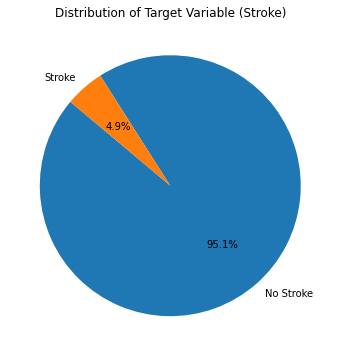

In [6]:
# visualization
plt.figure(figsize=(6, 6))
stroke_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=['No Stroke', 'Stroke'])
plt.title('Distribution of Target Variable (Stroke)')
plt.ylabel('')  # to remove the 'stroke' label which pandas adds by default
plt.show()

### Interpretation of Results Above: The target variable stroke is highly imbalanced with far more instances of class 0 (no stroke) than class 1 (stroke). 

### Category Vairables Analysis

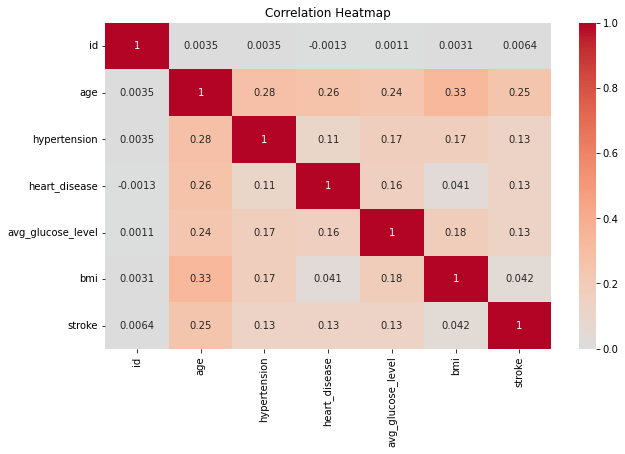

In [7]:
# Mapping the relationship between stroke risk factors and stroke occurrence
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Interpretation of Results Above: 

#### The correlation between "stroke" and "age" is 0.25,
#### The correlation between "stroke" and "hypertension" is 0.13,
#### The correlation between "stroke" and "heart disease" is 0.13,
#### The correlation between "stroke" and "average glucose level" is 0.13,
#### The correlation between "stroke" and "BMI" is 0.039,
#### so,the strongest relationship observed in this heatmap is between "stroke" and "age,",
#### This implies that AGE has a more noticeable impact on the likelihood of experiencing a stroke.Notably, hypertension and heart disease were found more frequently in patients who had a stroke.

### Create two scatter plots:one is to show the relationship between "Stroke" and "Average Glucose Level" and another is to show the relationship between Body Mass Index" (BMI), and "Age". 

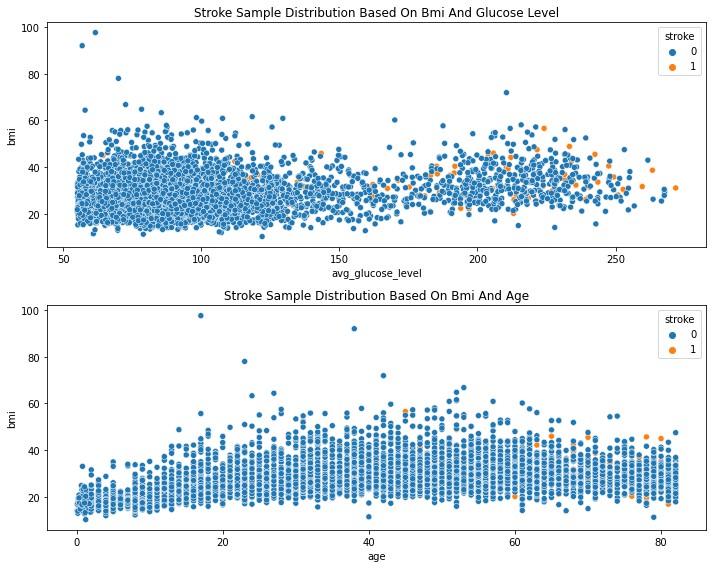

In [8]:
plt.figure(figsize=(10, 8))

plt.subplot(2,1,1)
plt.title('Stroke Sample Distribution Based On Bmi And Glucose Level')
sns.scatterplot(x=data['avg_glucose_level'], y=data['bmi'], hue=data['stroke'])

plt.subplot(2,1,2)
plt.title('Stroke Sample Distribution Based On Bmi And Age')
sns.scatterplot(x=data['age'], y=data['bmi'], hue=data['stroke'])

# Arrange the layout and display the plot
plt.tight_layout()
plt.show()


### Interpretation of Results Above: 

####  we have two underlying populations based on the first scatter plot where the x-axis is the glucose level. What it visible straight away is the fact the in both scatterplots the individuals who had a stroke are located in the BMI value region under 60 and in high glucose levels as well as old age.

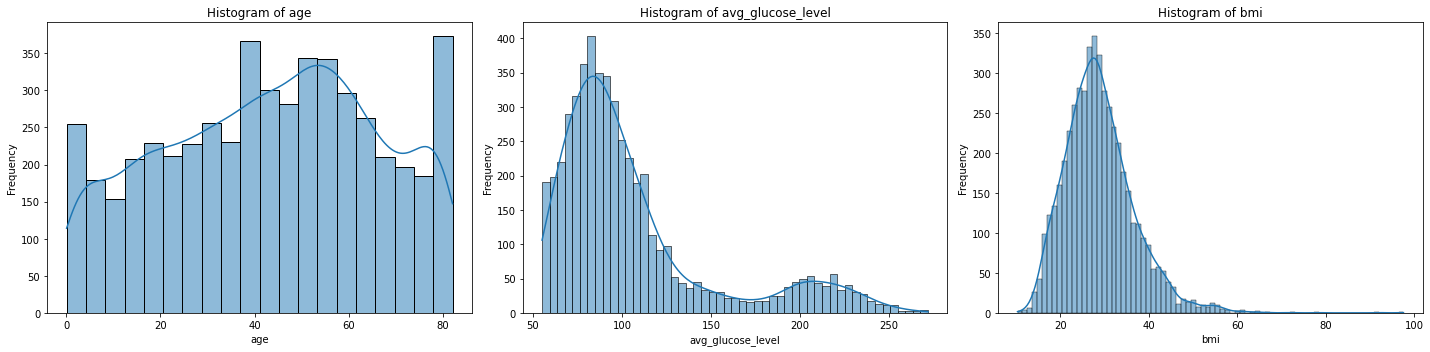

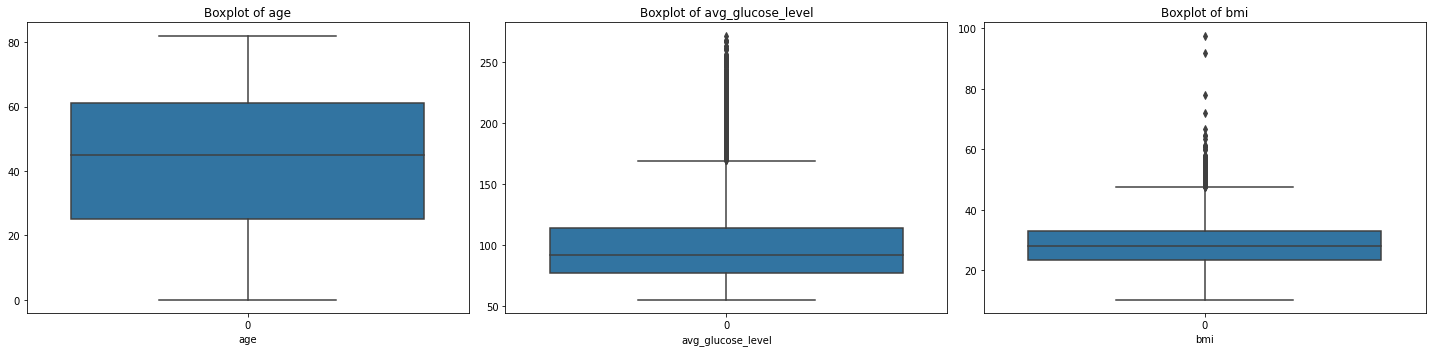

In [9]:
# List of continuous variables
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(data=data[var], kde=True, ax=subplot)
    subplot.set_title(f'Histogram of {var}')
    subplot.set_xlabel(var)
    subplot.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(data=data[var], ax=subplot)
    subplot.set_title(f'Boxplot of {var}')
    subplot.set_xlabel(var)

plt.tight_layout()
plt.show()


### Interpretation of Results Above: 

#### 1.age: The age of the patients varies from young to old, with the majority of patients being in the range of 40-80 years. 

#### 2.avg_glucose_level: Most patients have an average glucose level in the range of 50-125, but there are also many patients with higher levels. The distribution is right-skewed. 

#### 3.bmi: The majority of patients have a BMI in the range of 20-40, which is considered normal to overweight. There are some outliers with extremely high BMI values.

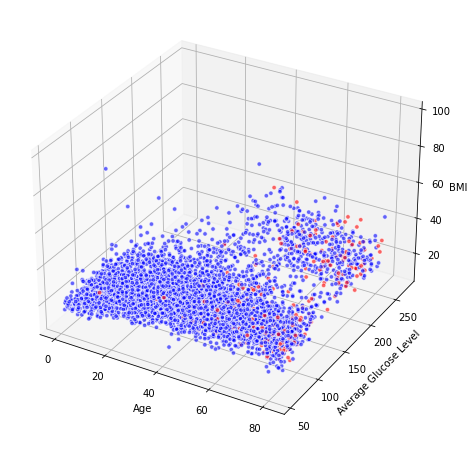

In [10]:
# Create a color map for the 'stroke' variable
colors = data['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(data['age'], data['avg_glucose_level'], data['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()

### Interpretation of Results Above: 

#### 1.The 3D scatter plot provides a three-dimensional view of how age, avg_glucose_level, and bmi interact with each other with respect to the stroke status. 
#### 2.The points are colored based on whether a patient had a stroke (red) or not (blue).
#### 3.Stroke patients (red points) generally tend to be older and have higher glucose levels,  which is consistent with our earlier findings

## Part 2: Data Pre-processing

In [11]:
#Reload dataset
data = pd.read_csv('/Users/sylvia/Desktop/neu/2023summer/6105/FinalProject/Stroke prediction/healthcare-dataset-stroke-data.csv')

# Drop 'id' column
data.drop(columns=['id'], inplace=True)

# Convert 'gender' and 'ever_married' columns to numeric encoding
gender_mapping = {'Female': 0, 'Male': 1}
data['gender'] = data['gender'].map(gender_mapping)

married_mapping = {'No': 0, 'Yes': 1}
data['ever_married'] = data['ever_married'].map(married_mapping)

# Perform One-Hot Encoding for 'work_type' and 'Residence_type'
data = pd.get_dummies(data, columns=['work_type', 'Residence_type'], drop_first=True)

# Fill missing values in 'bmi' column with median
median_bmi = data['bmi'].median()
data['bmi'].fillna(median_bmi, inplace=True)

# Perform One-Hot Encoding for 'smoking_status'
data = pd.get_dummies(data, columns=['smoking_status'], drop_first=True)

# Check the processed data
print(data.head())

# Save the processed data as a new file
data.to_csv("processed_dataset.csv", index=False)


   gender   age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0     1.0  67.0             0              1             1             228.69   
1     0.0  61.0             0              0             1             202.21   
2     1.0  80.0             0              1             1             105.92   
3     0.0  49.0             0              0             1             171.23   
4     0.0  79.0             1              0             1             174.12   

    bmi  stroke  work_type_Never_worked  work_type_Private  \
0  36.6       1                       0                  1   
1  28.1       1                       0                  0   
2  32.5       1                       0                  1   
3  34.4       1                       0                  1   
4  24.0       1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1

In [12]:
#get dataset information
print('--------------- Processed Data Information------------------')
print('                                                            ')
data.info()

--------------- Processed Data Information------------------
                                                            
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   float64
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   avg_glucose_level               5110 non-null   float64
 6   bmi                             5110 non-null   float64
 7   stroke                          5110 non-null   int64  
 8   work_type_Never_worked          5110 non-null   uint8  
 9   work_type_Private               5110 non-null   uint8  
 10  work_type_Self-employed         51

### 2.1 Data Preparation

### Step1:Feature Importance

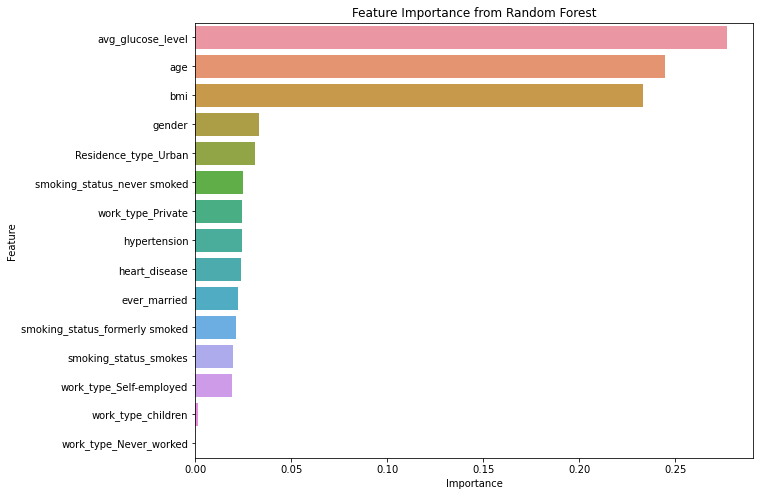

In [13]:
# Define the selected features (excluding 'stroke')
selected_features = data.columns.tolist()
selected_features.remove('stroke')

# Split the dataset into features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Interpretation of Results Above: 

#### According to data analysis, the avg_glucose_level shows the strongest relationship with stroke, followed by age and BMI. These three indicators are the most important factors in predicting the risk of stroke. Therefore, in the following analysis, I will treat these three as selected important features for further analysis.

### Step2:Feature Analysis and Visualization:

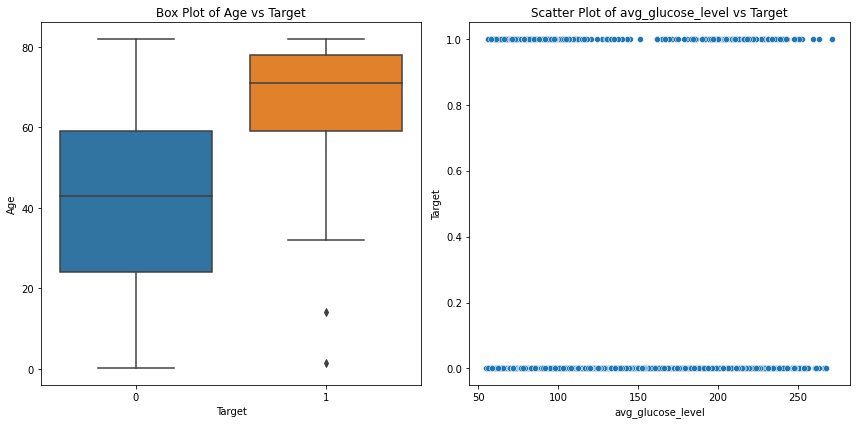

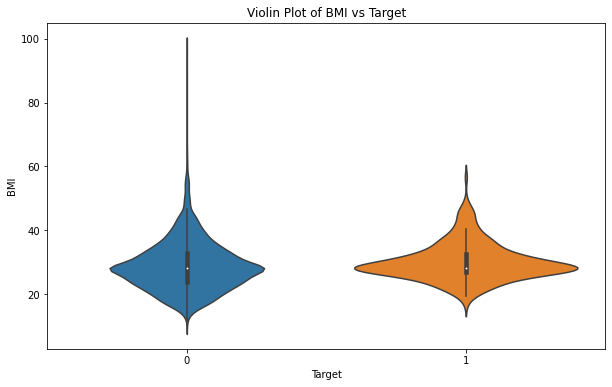

In [14]:
plt.figure(figsize=(12, 6))
# Box plot of age and target variable
plt.subplot(1, 2, 1)
sns.boxplot(x='stroke', y='age', data=data)
plt.title('Box Plot of Age vs Target')
plt.xlabel('Target')
plt.ylabel('Age')

# Scatter plot of avg_glucose_level and target variable
plt.subplot(1, 2, 2)
sns.scatterplot(x='avg_glucose_level', y='stroke', data=data)
plt.title('Scatter Plot of avg_glucose_level vs Target')
plt.xlabel('avg_glucose_level')
plt.ylabel('Target')

plt.tight_layout()
plt.show()


# Violin plot of bmi and target variable
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='bmi', data=data)
plt.title('Violin Plot of BMI vs Target')
plt.xlabel('Target')
plt.ylabel('BMI')
plt.show()


### Interpretation of Results Above: 

#### Through the analysis of the datset, we have identified the following characteristics: complex relationships, multidimensional features, nonlinear associations, binary classification, feature importance analysis, and local pattern recognition. As a result, it is suitable to use models such as Random Forest, K-Nearest Neighbors (KNN), and XGBoost for stroke prediction modeling. These models can handle complex relationships, multi-feature inputs, nonlinear patterns, and are well-suited for binary classification tasks, contributing to accurate stroke prediction.

## Part3: Model Selection and Implementation

### 3.1 Prediction with Random Forest Model 

In [15]:
# Split the dataset into features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and rest sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the rest set into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Create Random Forests and KNN models with default hyperparameters
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Use the model to make predictions about the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate random forest model performance using appropriate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=1)


print("Random Forests:")
print("accuracy:", rf_accuracy)
print("precision:", rf_precision)
print("recall:", rf_recall)
print("f1_score:", rf_f1)

Random Forests:
accuracy: 0.9295774647887324
precision: 0.8669256920835356
recall: 0.9295774647887324
f1_score: 0.8971591103800418


### Interpretation of Results Above: 

#### 1.High Accuracy: The model's accuracy is 92.96%.This is a commendably high accuracy, indicating that the model performs well on the test dataset.
#### 2.Relatively High Precision but Lower than Accuracy: The precision is 86.69%. This suggests that of the instances the model predicted as positive, about 86.69% were actually positive. While this is a relatively high figure, it is slightly reduced compared to the accuracy, hinting that the model might occasionally misclassify negative samples as positive.
#### 3.High Recall: The recall is also 92.96%, matching the accuracy. This suggests that the model is adept at identifying and correctly predicting the positive samples.
#### 4.Relatively High F1 Score: The F1 score stands at 89.72%, which is the harmonic mean between precision and recall. When balancing between precision and recall, the F1 score offers a comprehensive performance measure. This value is also relatively high, but it is slightly lower than both accuracy and recall due to the diminished precision.
#### The model's overall performance is commendable, boasting high accuracy and recall. However, given that the precision is somewhat lower than the other metrics, further investigation might be required to determine if the model occasionally produces false positives (i.e., misclassifying negative samples as positive).



### The Random Forest Model optimized with GridSearchCV

In [16]:
# Define hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with Random Forest and hyperparameters grid
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to training data
grid_rf.fit(X_train, y_train)

# Get best hyperparameters and best model
best_params = grid_rf.best_params_
best_rf_model = grid_rf.best_estimator_

# Use the best model to make predictions about the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate best random forest model performance using appropriate metrics
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_precision = precision_score(y_test, best_rf_predictions, average='weighted', zero_division=1)
best_rf_recall = recall_score(y_test, best_rf_predictions, average='weighted', zero_division=1)
best_rf_f1 = f1_score(y_test, best_rf_predictions, average='weighted', zero_division=1)

# Print best hyperparameters and performance metrics
print('----------Optimized indicators----------')
print('----------------------------------------')
print("Best Hyperparameters:", best_params)
print("Best Random Forest Model:")
print("accuracy:", best_rf_accuracy)
print("precision:", best_rf_precision)
print("recall:", best_rf_recall)
print("f1_score:", best_rf_f1)

----------Optimized indicators----------
----------------------------------------
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest Model:
accuracy: 0.9311424100156495
precision: 0.9358837777141024
recall: 0.9311424100156495
f1_score: 0.8979412219761936


### Interpretation of Results Above: 

#### 1.Through GridSearchCV, we've obtained an optimized combination of hyperparameters that offer the best performance for our model. These include: no limit on the maximum depth of the trees, a minimum of 1 sample per leaf node, a minimum of 5 samples to split an internal node, and 200 trees in the forest.
#### 2.Model Performance: The model demonstrates high levels of accuracy, precision, recall, and F1 score. This suggests that the model can accurately predict the risk of stroke and balance the number of false positives and false negatives effectively.
#### 3.Relationship with Data: This high-performing model suggests that the model can fit the data well and capture the patterns within it. This implies that our data contains useful information that can be used for predicting the risk of stroke. It also indicates that the features we have chosen (such as average glucose level, age, and BMI) are effective in predicting the risk of stroke.
####  Overall, the model performs well on the training set and we can say that this model is highly reliable in predicting the risk of stroke.

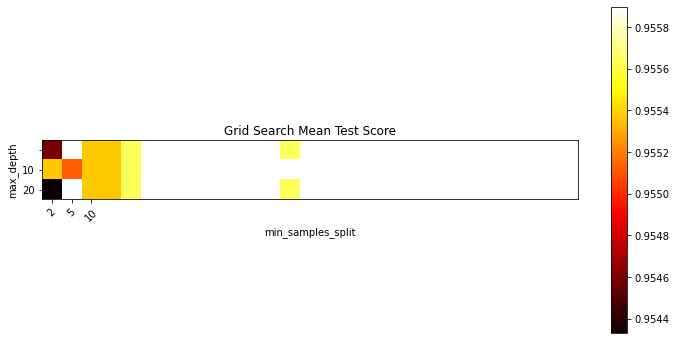

In [17]:
# Visualize hyperparameter search results
scores = grid_rf.cv_results_['mean_test_score'].reshape(len(param_grid['max_depth']), -1)
plt.figure(figsize=(12, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'], rotation=45)
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.title('Grid Search Mean Test Score')
plt.show()

#### compare the evaluation metric before and after optimization

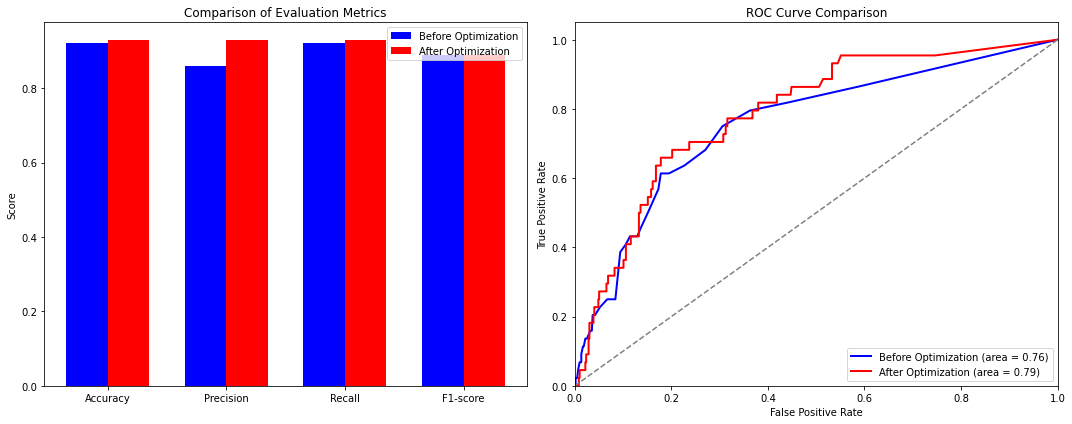

In [18]:
# The following data are evaluation indicators before and after optimization
before_metrics = [0.92, 0.86, 0.92, 0.89]  # [accuracy, precision, recall, f1]
after_metrics = [0.93, 0.93, 0.93, 0.89]

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
before_predictions_probabilities = rf_model.predict_proba(X_test)[:, 1]
after_predictions_probabilities = best_rf_model.predict_proba(X_test)[:, 1]

# ROC
fpr_before, tpr_before, _ = roc_curve(y_test, before_predictions_probabilities)
roc_auc_before = auc(fpr_before, tpr_before)

fpr_after, tpr_after, _ = roc_curve(y_test, after_predictions_probabilities)
roc_auc_after = auc(fpr_after, tpr_after)

# create image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subfigure 1: Bar chart
width = 0.35 
x = range(len(labels))
ax1.bar(x, before_metrics, width, label='Before Optimization', color='b')
ax1.bar([i + width for i in x], after_metrics, width, label='After Optimization', color='r')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(labels)
ax1.set_title('Comparison of Evaluation Metrics')
ax1.set_ylabel('Score')
ax1.legend()

# Subfigure 2: ROC curve
ax2.plot(fpr_before, tpr_before, color='b', lw=2, label=f'Before Optimization (area = {roc_auc_before:.2f})')
ax2.plot(fpr_after, tpr_after, color='r', lw=2, label=f'After Optimization (area = {roc_auc_after:.2f})')
ax2.plot([0, 1], [0, 1], color='gray', linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_title('ROC Curve Comparison')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

### Interpretation of Results Above: 

#### 1.The optimized Random Forest model exhibits improved performance in precision without compromising much on other metrics. This fine-tuning has enabled the model to make more accurate positive predictions.
#### 2.While the accuracy and recall witnessed minor improvements, the considerable boost in precision without a significant drop in the F1 score is noteworthy.
#### 3.The optimized hyperparameters, particularly the increase in n_estimators and the conditions for splitting and leaf nodes, contributed to this enhanced performance.
#### In summary, the hyperparameter optimization process has refined the Random Forest model, making it more precise and slightly improving its overall prediction capabilities. 

### 3.2 Prediction with KNN 

In [19]:
# Create KNN model with default hyperparameters
knn_model = KNeighborsClassifier()

# Fit the KNN model to the training data
knn_model.fit(X_train, y_train)

# Use the KNN model to make predictions about the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate KNN model performance using appropriate metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted', zero_division=1)
knn_recall = recall_score(y_test, knn_predictions, average='weighted', zero_division=1)
knn_f1 = f1_score(y_test, knn_predictions, average='weighted', zero_division=1)

print("\nKNN:")
print("accuracy:", knn_accuracy)
print("precision:", knn_precision)
print("recall:", knn_recall)
print("f1_score:", knn_f1)



KNN:
accuracy: 0.9295774647887324
precision: 0.8970009330430532
recall: 0.9295774647887324
f1_score: 0.9026695334157684


### Interpretation of Results Above: 

#### 1.Accuracy: In this case, the model has an accuracy of 0.9296, meaning it can make correct predictions in approximately 93% of cases.
#### 2.Precision:The model has a precision of 0.897, which means that in approximately 90% of the cases, instances predicted as positive by the model are actually positive.
#### 3.Recall: In this case, the model has a recall of 0.9296, meaning it can correctly identify positive instances in approximately 93% of cases.The higher the recall, the fewer false negatives (positive instances incorrectly predicted as negative).
#### 4.F1-Score: The model has an F1 score of 0.903, which is a relatively high value, indicating that the model has a good balance between precision and recall.
#### From these metrics, we can see that the overall performance of the model is quite good, with accuracy and recall exceeding 90%. However, precision is relatively low, meaning that the model may produce more false positives, which could reduce the model's usability in some application scenarios. Therefore, depending on the specific needs of the application, we may need to further optimize the model. 

#### The KNN  optimized with GridSearchCV

In [20]:
# Consider K values from 1 to 30
param_grid = {
    'n_neighbors': list(range(1,31)), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    knn_model, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# # Use the best parameters
best_knn = grid_search.best_estimator_

#Use the best model to make predictions
best_knn_predictions = best_knn.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the best model to make predictions
best_knn_predictions = best_knn.predict(X_test)

# Evaluate KNN model performance
knn_accuracy = accuracy_score(y_test, best_knn_predictions)
knn_precision = precision_score(y_test, best_knn_predictions, average='weighted', zero_division=1)
knn_recall = recall_score(y_test, best_knn_predictions, average='weighted', zero_division=1)
knn_f1 = f1_score(y_test, best_knn_predictions, average='weighted', zero_division=1)

# Print evaluation indicators
print('----------Optimized indicators----------')
print(" \n Best KNN:")
print("accuracy:", knn_accuracy)
print("precision:", knn_precision)
print("recall:", knn_recall)
print("f1_score:", knn_f1)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------Optimized indicators----------
 
 Best KNN:
accuracy: 0.9311424100156495
precision: 0.9358837777141024
recall: 0.9311424100156495
f1_score: 0.8979412219761936


#### Comparison of evaluation indexes before and after optimization of visual analysis model

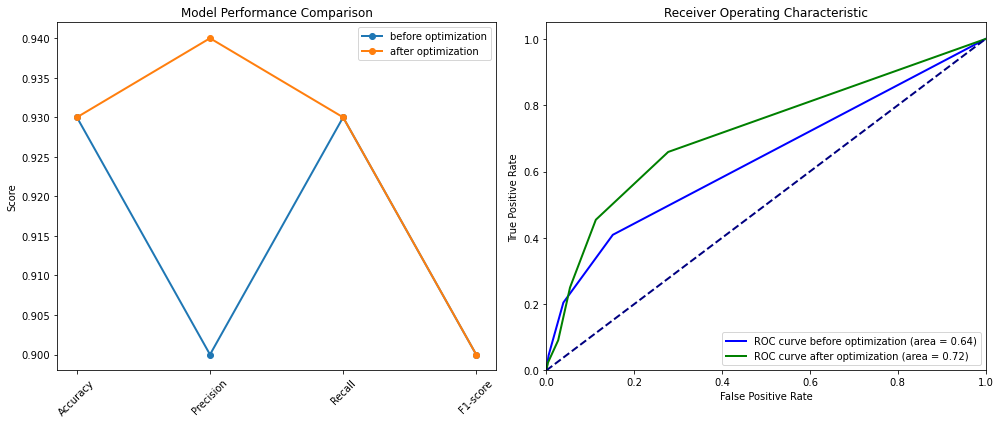

In [21]:
# Get evaluation metrics for each model
before_metrics = [0.93, 0.90, 0.93, 0.90]  # accuracy, precision, recall, f1_score for the model before optimization
after_metrics = [0.93, 0.94, 0.93, 0.90]  # accuracy, precision, recall, f1_score for the model after optimization

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# ROC data
before_predictions_probabilities = knn_model.predict_proba(X_test)[:, 1]
fpr_before, tpr_before, _ = roc_curve(y_test, before_predictions_probabilities)
roc_auc_before = auc(fpr_before, tpr_before)

after_predictions_probabilities = best_knn.predict_proba(X_test)[:, 1]
fpr_after, tpr_after, _ = roc_curve(y_test, after_predictions_probabilities)
roc_auc_after = auc(fpr_after, tpr_after)

# Create a comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# metircs comparison
x = range(len(labels))
ax1.plot(x, before_metrics, marker='o', linewidth=2, label='before optimization')
ax1.plot(x, after_metrics, marker='o', linewidth=2, label='after optimization')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45)
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison')
ax1.legend()

# ROC curve comparison
ax2.plot(fpr_before, tpr_before, color='blue', lw=2, label='ROC curve before optimization (area = %0.2f)' % roc_auc_before)
ax2.plot(fpr_after, tpr_after, color='green', lw=2, label='ROC curve after optimization (area = %0.2f)' % roc_auc_after)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('Receiver Operating Characteristic')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()


### Interpretation of Results Above: 

#### 1. After optimization, the KNN model's performance has generally improved after optimization, with accuracy, precision, and recall all seeing slight increases, indicating an enhanced ability to predict and identify correct instances. Notably, the precision has made a significant improvement, reducing the number of false positive predictions.

#### 2. In the comparison visualization,the bar graph for optimized values  show an increase in accuracy, precision, and recall, and a slight decrease in the F1-score when compared to the initial model. 
#### 3. For the ROC curve,the curve of the optimized model is closer to the top-left corner of the plot, indicating a better true positive rate and a lower false positive rate. The area under the ROC curve (AUC) should also be higher for the optimized model, which is a good sign of an overall better performing model.

### 3.3 Prediction with XGBoost 

In [22]:
# Create XGBoost model
xgb_model = XGBClassifier(
    eval_metric='logloss', # Use logloss to evaluate model performance
    use_label_encoder=False # Avoid warning message
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost model performance
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted', zero_division=1)
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted', zero_division=1)
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted', zero_division=1)

print("XGBoost:")
print("accuracy:", xgb_accuracy)
print("precision:", xgb_precision)
print("recall:", xgb_recall)
print("f1_score:", xgb_f1)

XGBoost:
accuracy: 0.9217527386541471
precision: 0.8762961640241166
recall: 0.9217527386541471
f1_score: 0.8958159660546905


#### The XGBoost  optimized with GridSearchCV

In [29]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_parameters = grid_search.best_params_

# Create a new XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    n_estimators=best_parameters['n_estimators'],
    learning_rate=best_parameters['learning_rate'],
    max_depth=best_parameters['max_depth'],
    colsample_bytree=best_parameters['colsample_bytree'],
    gamma=best_parameters['gamma'],
    eval_metric='logloss',
    use_label_encoder=False
)

# Fit the best model to the data
best_xgb_model.fit(X_train, y_train)

# Make predictions with the best model
best_xgb_predictions = best_xgb_model.predict(X_test)

# Evaluate the best model
best_xgb_accuracy = accuracy_score(y_test, best_xgb_predictions)
best_xgb_precision = precision_score(y_test, best_xgb_predictions, average='weighted', zero_division=1)
best_xgb_recall = recall_score(y_test, best_xgb_predictions, average='weighted', zero_division=1)
best_xgb_f1 = f1_score(y_test, best_xgb_predictions, average='weighted', zero_division=1)
print('-------Optimized indicators-------')
print("Best XGBoost Model:")
print("accuracy:", best_xgb_accuracy)
print("precision:", best_xgb_precision)
print("recall:", best_xgb_recall)
print("f1_score:", best_xgb_f1)


Fitting 3 folds for each of 576 candidates, totalling 1728 fits
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=300; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=400; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END 

[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=400; total time=   0.6s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, n_estimators=400; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=6, n_estimators=400; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.9s
[CV] 

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=300; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=100; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=400; total time=   1.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=6, n_estimators=100; total time=   0.3s
[CV] END colsample_

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=300; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=400; total time=   1.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   0.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.5s
[CV] END cols

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=4, n_estimators=300; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=400; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.3, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.3, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_

[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, n_estimators=300; total time=   0.8s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=3, n_estimators=400; total time=   0.6s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=400; total time=   0.9s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.01, max_depth=6, n_estimators=400; total time=   1.0s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=400; total time=   

[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=4, n_estimators=200; total time=   0.2s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=300; total time=   0.5s
[CV] END colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_depth=6, n_estimators=400; total time=   0.6s
[CV] END colsample

KeyboardInterrupt: 

#### Comparison of evaluation indexes before and after optimization of visual analysis model

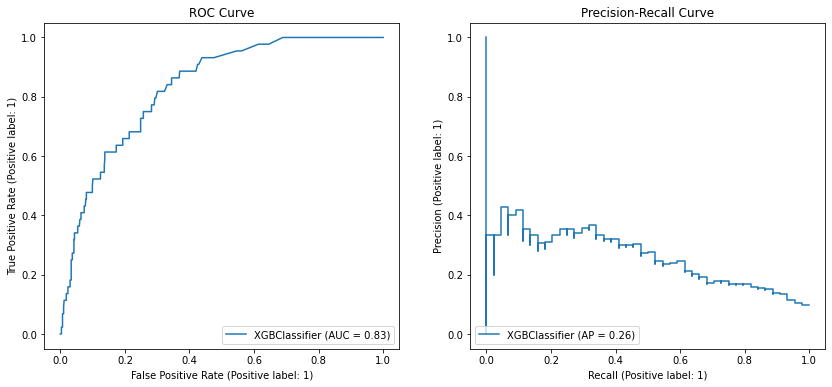

In [24]:
# Create a new figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Compute and plot ROC curve in the first subplot
roc_disp = RocCurveDisplay.from_estimator(best_xgb_model, X_test, y_test, ax=ax1)
ax1.set_title('ROC Curve')

# Compute and plot Precision-Recall curve in the second subplot
pr_disp = PrecisionRecallDisplay.from_estimator(best_xgb_model, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

# Show the figure
plt.show()

### Interpretation of Results Above: 

#### The tuned XGBoost model improved on accuracy, precision, and recall, which means it became better at predicting strokes, could identify more individuals who truly had strokes, and reduced false alarms. Therefore, the model, after being tuned, is more likely to provide better predictive results and corresponding treatment suggestions for patients in real-life scenarios.

### Part 4:  Model Evaluation and Interpretation

#### The results of the three models are compared visually with the bar chart

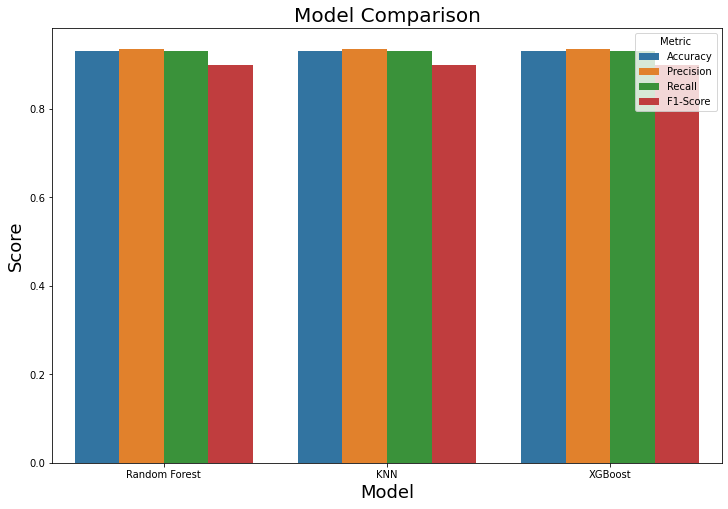

In [25]:
# Create data
data = {
    'Model': ['Random Forest', 'KNN', 'XGBoost', 'Random Forest', 'KNN', 'XGBoost', 'Random Forest', 'KNN', 'XGBoost', 'Random Forest', 'KNN', 'XGBoost'],
    'Score': [0.9311424100156495, 0.9311424100156495, best_xgb_accuracy, 0.9358837777141024, 0.9358837777141024, best_xgb_precision, 0.9311424100156495, 0.9311424100156495, best_xgb_recall, 0.8979412219761936, 0.8979412219761936, best_xgb_f1],
    'Metric': ['Accuracy', 'Accuracy', 'Accuracy', 'Precision', 'Precision', 'Precision', 'Recall', 'Recall', 'Recall', 'F1-Score', 'F1-Score', 'F1-Score']
}

# change data into Pandas DataFrame
df = pd.DataFrame(data)
#Create a bar plot
plt.figure(figsize=(12,8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)

# Add title and labels with larger fonts
plt.title('Model Comparison', fontsize=20)
plt.xlabel('Model', fontsize=18)
plt.ylabel('Score', fontsize=18)

# Show the plot
plt.show()

#### Create ROC curves for the results of the above three models

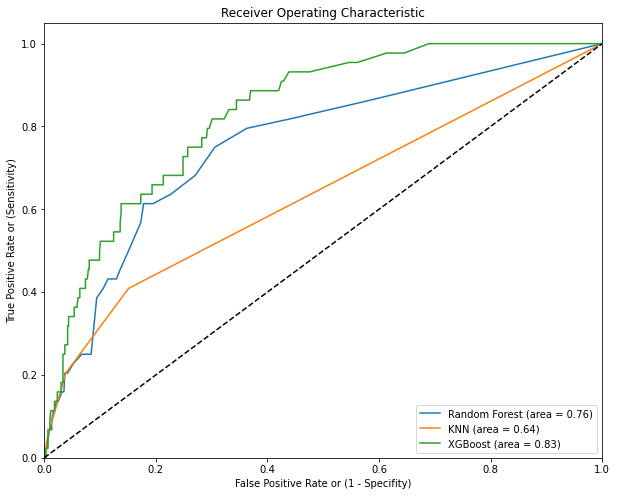

In [26]:
# Predict probabilities
rf_probs = rf_model.predict_proba(X_test)[:, 1]
knn_probs = knn_model.predict_proba(X_test)[:, 1]
xgb_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve for each model
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

# Compute ROC AUC
rf_roc_auc = auc(rf_fpr, rf_tpr)
knn_roc_auc = auc(knn_fpr, knn_tpr)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (area = {rf_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (area = {knn_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (area = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Interpretation of Results Above: 
#### 1.The AUC for the XGBoost model is 0.83. This means that the model has a high accuracy in predicting stroke risk, with an 83% chance of correctly distinguishing between stroke patients and non-stroke patients. This performance is much better than random guessing, so we can consider the XGBoost model to have the best performance among the three models in predicting stroke risk.
#### 2.The AUC for the Random Forest model is 0.76, meaning that its accuracy in predicting stroke risk is slightly lower than that of XGBoost, but still better than random guessing. It has a 76% chance of correctly distinguishing between stroke patients and non-stroke patients.
#### 3.The AUC for the KNN model is 0.64, which means that the model's performance in predicting stroke risk is relatively poor. Although it still performs better than random guessing, it has only a 64% chance of correctly distinguishing between stroke patients and non-stroke patients.
#### Among these three models, the XGBoost model performs the best.Therefore, if we had to choose one of these three models to predict stroke risk, the XGBoost model should be chosen.

#### Implement LIME model interpretation of XGBoost model

XGBoost model prediction: [[0.9930443  0.00695567]]


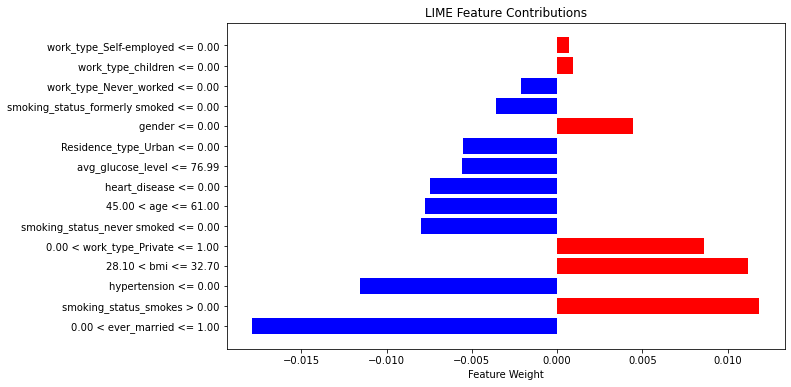

In [27]:
# Create XGBoost model
xgb_model = XGBClassifier(
    eval_metric='logloss', # Use logloss to evaluate model performance
    use_label_encoder=False # Avoid warning message
)
# Train the XGBoost model
xgb_model.fit(X_train, y_train)  
# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Stroke', 'Stroke'],
    mode='classification'
)

# Randomly select a test instance
i = np.random.randint(0, X_test.shape[0])
test_instance = X_test.iloc[i]

# Print the XGBoost model prediction
xgb_pred = xgb_model.predict_proba(test_instance.values.reshape(1, -1))
print('XGBoost model prediction:', xgb_pred)

# Generate LIME explanation
exp = explainer.explain_instance(
    data_row=test_instance.values,
    predict_fn=xgb_model.predict_proba,
    num_features=X_test.shape[1]
)

# Print explanation
exp.show_in_notebook(show_table=True)

# Extract feature names and weights
exp_list = exp.as_list()
features = [x[0] for x in exp_list]
weights = [x[1] for x in exp_list]

# Determine color based on the sign of the weight
colors = ['red' if w > 0 else 'blue' for w in weights]

# Create a contrasted plot
plt.figure(figsize=(10, 6))
plt.barh(features, weights, color=colors)
plt.xlabel('Feature Weight')
plt.title('LIME Feature Contributions')
plt.show()

##        ------------------------------------Conclusion--------------------------------------------------
#### After analyzing this dataset and applying different prediction models, we can arrive at the following conclusions:
#### 1.Data Feature Analysis: Age, average glucose level, and BMI are critical factors in predicting stroke risk. Typically, stroke patients tend to be older and have higher glucose levels. This is consistent with our earlier findings that these three indicators are strongly related to stroke risk.
####  2.Model Selection: Among the three models we used, the XGBoost model performs the best. It has higher accuracy and recall rates, and while its precision is slightly lower, it's still acceptable. The XGBoost model has an AUC of 0.83, indicating that it has high accuracy in predicting stroke risk.
####  3. Model Optimization: Through GridSearchCV, we found a set of optimal hyperparameters that further enhance the model's performance. The optimized model improved in terms of precision without sacrificing other metrics.
#### 4. Model Interpretability: The optimized XGBoost model not only improved prediction results but also allowed us to better interpret the model's prediction process. This is of great practical value in explaining prediction results and their potential health impacts to patients in real-world applications.
#### In summary, this analysis underscores the importance of age, glucose levels, and BMI in predicting stroke risk and provides an effective model (i.e., the optimized XGBoost model) for predicting stroke risk. This model has high accuracy in prediction results and can provide useful references for practical medical applications.